In [1]:
import os
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from rDLSpp import IOfuncs as iof
from rDLSpp import RheoConfig as rconf
from rDLSpp import RheoCorr as rcorr
from rDLSpp import FTrheo as ft
from DSH import SharedFunctions as sf

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.WARNING)
logging.info('LoadRheoData tutorial started')

INFO:root:LoadRheoData tutorial started


This tutorial explains how to load and analyze oscillatory rheology experiments

In [2]:
froot = r'D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004'
rheo_protocol = rconf.RheoProtocol(froot, 'Config_Rheo.ini', 'expLog.txt')
print(rheo_protocol)

INFO:root:22 rows read from expLog file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\expLog.txt


<RheoProtocol (4 intervals)>


In [3]:
list_names = rheo_protocol.GetFullFilenames()
list_names

['D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\01_Presh_ASC.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\01_Presh_DESC.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_000a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_001a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_002a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_003a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_004a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_005a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_006a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_007a.txt',
 'D:\\steaime\\Data\\RheoSALS\\240125\\240125_Oscills_Rheo\\2s\\004\\02_RelaxDSS_008a.t

In [4]:
rheo_explog = rheo_protocol.LoadExpLog()
rheo_explog

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,2,1.13223,4,01_Presh,<err>,1,1,<err>,12,0,...,0.021177,1.12015,12,13,0.0800195,-0.0636998,0,1,0,1
1,2,2.26012,4,01_Presh,<err>,1,1,<err>,12,0,...,1.14906,2.24861,13,12,-0.052118,0.108974,0,1,0,1
2,1,23.0992,0,02_RelaxDSS_000,<err>,0.5,0.314159,10,12,0,...,2.29878,22.7802,12,12,-0.222907,0.0200812,0,1,0,1
3,2,43.919,0,02_RelaxDSS_001,<err>,0.374947,0.235586,10,12,0,...,23.1206,43.6066,12,12,-0.0416578,0.0277413,0,1,0,1
4,3,64.7627,0,02_RelaxDSS_002,<err>,0.281171,0.176665,10,12,0,...,43.9394,64.4417,12,12,-0.0431532,0.000518815,0,1,0,1
5,4,85.5608,0,02_RelaxDSS_003,<err>,0.210848,0.13248,10,12,0,...,64.7818,85.246,12,12,0.00265511,0.0284127,0,1,0,1
6,5,106.361,0,02_RelaxDSS_004,<err>,0.158114,0.0993459,10,12,0,...,85.5818,106.042,12,12,-0.00183111,-0.00875881,0,1,0,1
7,6,127.16,0,02_RelaxDSS_005,<err>,0.118569,0.0744989,10,12,0,...,106.381,126.845,12,12,-0.0294198,-0.0252388,0,1,0,1
8,7,147.958,0,02_RelaxDSS_006,<err>,0.088914,0.0558663,10,12,0,...,127.179,147.644,12,12,-0.0606403,-0.0352184,0,1,0,1
9,8,168.746,0,02_RelaxDSS_007,<err>,0.0666761,0.0418938,10,12,0,...,147.97,168.424,12,12,-0.029725,-0.0748009,0,1,0,1


INFO:root:Reading columns (1, 2, 6) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_001a.txt (unpack)


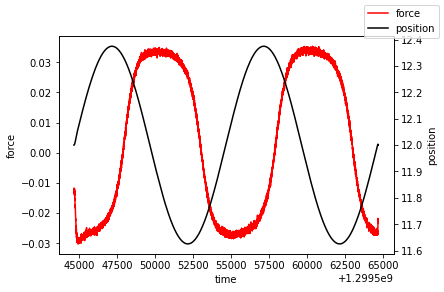

In [5]:
fidx = 3
int_time, int_pos, int_force = iof.ReadRheoData(list_names[fidx], usecols=(1, 2, 6), unpack=True)
if int_pos is not None:
    fig, ax = plt.subplots()
    ax.plot(int_time, int_force, 'r-', label='force')
    ax.set_xlabel('time')
    ax.set_ylabel('force')
    ax2 = ax.twinx()
    ax2.plot(int_time, int_pos, 'k-', label='position')
    ax2.set_ylabel('position')
    fig.legend()


In [36]:
tlen = 1
res_list = []
for i in range(len(list_names)):
    cur_fname = os.path.basename(list_names[i])[:-5]
    find_params = rheo_explog[rheo_explog['Name'].str.contains(cur_fname)]
    if len(find_params)==1:
        find_params = find_params.iloc[0]
        if int(find_params['Type'])==0:
            cur_G, cur_opt = ft.FTanalysisRheology(list_names[i], Period=float(find_params['Period']), AnalyzePeriods=tlen, FreqRecord=None)
        res_list.append([float(find_params['StartedOn']), float(find_params['Displacement']), float(find_params['Period']), float(find_params['Offset']), np.abs(cur_opt['F']), np.angle(cur_opt['F']), np.abs(cur_opt['x']), np.angle(cur_opt['x']), np.abs(cur_opt['F']/cur_opt['x']), np.angle(cur_opt['F']/cur_opt['x']), cur_opt['F0']])
    else:
        print('Error finding parameters for result ' + list_names[i])
        cur_G, cur_opt = np.nan, {}
res_arr = np.asarray(res_list)
np.savetxt(os.path.join(froot, 'analysis_out_T' + str(tlen).zfill(2) + '_goodFcorr.dat'), res_arr, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tF_avg')

INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_000a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_001a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_002a.txt (unpack)


Error finding parameters for result D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\01_Presh_ASC.txt
Error finding parameters for result D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\01_Presh_DESC.txt


INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_003a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_004a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_005a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_006a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_007a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_008a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaime\Data\RheoSALS\240125\240125_Oscills_Rheo\2s\004\02_RelaxDSS_009a.txt (unpack)
INFO:root:Reading columns (1, 2, 5) from file D:\steaim

Analyze ramp of strain rates to get a flow curve:

INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_000a_ASC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_000a_DESC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_001a_ASC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_001a_DESC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_002a_ASC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_002a_DESC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_003a_ASC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_003a_DESC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_004a_ASC.txt (unpack)
INFO:root:Reading columns (2, 6) from file E:\240708_Rhodorsil_2\02_FlowCurve_004a_DESC.txt (unp

Flowcurve computed and fitted with linear expressiong f=m*v+q with m = 0.10 kg/s and q = 0.99 mN


Text(0, 0.5, 'force [N]')

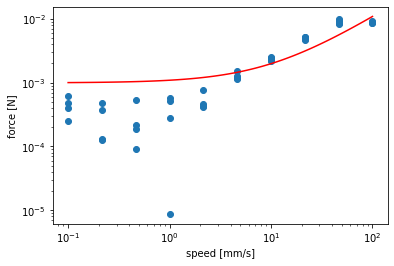

In [24]:
Force_offset = -0.004

speed = []
avg_force = []
avg_posrange = [17.5, 18]
for i in range(2, 42):
    cur_int_pos, cur_int_force = iof.ReadRheoData(list_names[i], usecols=(2, 6), unpack=True)
    cur_int_force = cur_int_force - Force_offset
    speed.append(float(rheo_protocol.LoadExpLog().iloc[i]['Speed']))
    avg_force.append(np.mean(cur_int_force[np.where(np.logical_and(cur_int_pos>=avg_posrange[0], cur_int_pos<=avg_posrange[1]))]))
m, q = np.polyfit(speed, np.abs(avg_force), 1)
print('Flowcurve computed and fitted with linear expressiong f=m*v+q with m = {0:.2f} kg/s and q = {1:.2f} mN'.format(m*1e3, q*1e3))

fig, ax = plt.subplots()
ax.plot(speed, np.abs(avg_force), 'o')
xarr = np.geomspace(np.min(speed), np.max(speed), 100)
ax.plot(xarr, m*xarr+q, 'r-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('speed [mm/s]')
ax.set_ylabel('force [N]')